<a href="https://colab.research.google.com/github/boon11/DSI202-Full-Stack-Software-Development/blob/main/Inference_MixerTH_DSI_TU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TTS Inference Model Selection

This notebook can be used to generate audio samples using either NeMo's pretrained models or after training NeMo TTS models. This notebook supports all TTS models and is intended to showcase different models and how their results differ.

# License

> Copyright 2020 NVIDIA. All Rights Reserved.
>
> Licensed under the Apache License, Version 2.0 (the "License");
> you may not use this file except in compliance with the License.
> You may obtain a copy of the License at
>
>     http://www.apache.org/licenses/LICENSE-2.0
>
> Unless required by applicable law or agreed to in writing, software
> distributed under the License is distributed on an "AS IS" BASIS,
> WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
> See the License for the specific language governing permissions and
> limitations under the License.

In [ ]:
"""
You can either run this notebook locally (if you have all the dependencies and a GPU) or on Google Colab.
Instructions for setting up Colab are as follows:
1. Open a new Python 3 notebook.
2. Import this notebook from GitHub (File -> Upload Notebook -> "GITHUB" tab -> copy/paste GitHub URL)
3. Connect to an instance with a GPU (Runtime -> Change runtime type -> select "GPU" for hardware accelerator)
4. Run this cell to set up dependencies.
"""
BRANCH = 'main'
# # If you're using Google Colab and not running locally, uncomment and run this cell.
!apt-get install sox libsndfile1 ffmpeg
!pip install wget text-unidecode
!git clone https://github.com/NVIDIA/NeMo.git
# !python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]
!wget https://raw.githubusercontent.com/NVIDIA/NeMo/main/nemo_text_processing/install_pynini.sh
!bash install_pynini.sh

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsndfile1 is already the newest version (1.0.31-2build1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa libsox-fmt-base
  libsox3 libwavpack1
Suggested packages:
  libsox-fmt-all
The following NEW packages will be installed:
  libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa libsox-fmt-base
  libsox3 libwavpack1 sox
0 upgraded, 7 newly installed, 0 to remove and 18 not upgraded.
Need to get 617 kB of archives.
After this operation, 1,764 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopencore-amrnb0 amd64 0.1.5-1 [94.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopencore-amrwb0 amd64 0.1.5-1 [49.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libsox3 am

In [ ]:
!cat NeMo/requirements/*.txt > nemo_requirements.txt

In [ ]:
!pip install -r nemo_requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 60.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.1 MB/s eta 0:00:

# Download Pretrained model

In [ ]:
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
!gdown 11zJxQAJ4LhhjwW2a6sZHepQWc6nrmKZk

Downloading...
From: https://drive.google.com/uc?id=11zJxQAJ4LhhjwW2a6sZHepQWc6nrmKZk
To: /content/Mixer-TH-NOON.nemo
100% 80.8M/80.8M [00:00<00:00, 101MB/s]


In [ ]:
!gdown 1iKR6lcaI7vqReIyNWKQTFU5vZWelB3GI
!cp tts_tokenizers_bk.py tts_tokenizers.py
!cp tts_tokenizers.py NeMo/nemo/collections/common/tokenizers/text_to_speech
!echo "from nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers import ThaiPhonemeTokenizer" >> NeMo/nemo/collections/common/tokenizers/text_to_speech/__init__.py

Downloading...
From (uriginal): https://drive.google.com/uc?id=1iKR6lcaI7vqReIyNWKQTFU5vZWelB3GI
From (redirected): https://drive.google.com/uc?id=1iKR6lcaI7vqReIyNWKQTFU5vZWelB3GI&confirm=t&uuid=d756a3bd-7ae8-46ac-b5f5-aac6109d9848
To: /content/tts_tokenizers_bk.py
100% 37.8k/37.8k [00:00<00:00, 51.8MB/s]


## Models

First we pick the models that we want to use. Currently supported models are:

Spectrogram Generators:
- [Tacotron 2](https://ngc.nvidia.com/catalog/models/nvidia:nemo:tts_en_tacotron2)
- [FastPitch](https://ngc.nvidia.com/catalog/models/nvidia:nemo:tts_en_fastpitch)
- [Mixer-TTS](https://ngc.nvidia.com/catalog/models/nvidia:nemo:tts_en_lj_mixertts)
- [Mixer-TTS-X](https://ngc.nvidia.com/catalog/models/nvidia:nemo:tts_en_lj_mixerttsx)

Audio Generators
- [WaveGlow](https://ngc.nvidia.com/catalog/models/nvidia:nemo:tts_waveglow_88m)
- [HiFiGAN](https://ngc.nvidia.com/catalog/models/nvidia:nemo:tts_hifigan)
- [UnivNet](https://ngc.nvidia.com/catalog/models/nvidia:nemo:tts_en_lj_univnet)
- Griffin-Lim

## Load model checkpoints

Next we load the pretrained model provided by NeMo. All NeMo models have two functions to help with this

- list_available_models(): This function will return a list of all pretrained checkpoints for that model
- from_pretrained(): This function will download the pretrained checkpoint, load it, and return an instance of the model

Below we will use `from_pretrained` to load the chosen models from above.

In [ ]:
#Download model file

#https://drive.google.com/file/d/1Us8UIYCYd_zXjuVUarW8uhNzVDsQZ7gM/view?usp=sharing

In [ ]:
import sys
sys.path.insert(0,"NeMo")

import glob
import os
from ipywidgets import Select, HBox, Label
from IPython.display import display

from omegaconf import OmegaConf, open_dict
import torch
from nemo.collections.tts.models.base import SpectrogramGenerator, Vocoder
from nemo.collections.tts.models import MixerTTSModel
from nemo.collections.tts.models import HifiGanModel

def load_spectrogram_model():
    override_conf = None

    checkpoint_path = "Mixer-TH-NOON.nemo"

    model = MixerTTSModel.restore_from(checkpoint_path)
    return model


def load_vocoder_model():
    pretrained_model = "tts_en_lj_hifigan_ft_mixerttsx"
    print(pretrained_model)

    model = Vocoder.from_pretrained(pretrained_model, strict=True)

    return model



In [ ]:
!mkdir -p /content/nemo_text_processing/text_normalization/en/data/whitelist/
!wget https://raw.githubusercontent.com/NVIDIA/NeMo/main/nemo_text_processing/text_normalization/en/data/whitelist/lj_speech.tsv
!cp lj_speech.tsv /content/nemo_text_processing/text_normalization/en/data/whitelist/lj_speech.tsv

--2023-09-20 03:19:51--  https://raw.githubusercontent.com/NVIDIA/NeMo/main/nemo_text_processing/text_normalization/en/data/whitelist/lj_speech.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-09-20 03:19:52 ERROR 404: Not Found.

cp: cannot stat 'lj_speech.tsv': No such file or directory


In [ ]:
spec_gen = load_spectrogram_model().eval()
vocoder = load_vocoder_model().eval()

[NeMo W 2023-09-20 03:20:41 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.MixerTTSXDataset
      manifest_filepath: /opt/data/corpus/noon_tsync2/trim_wav_noon_train.json
      sample_rate: 22050
      sup_data_path: mixer_tts_sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: 8000
      max_duration: null
      min_duration: 0.1
      ignore_file: null
      trim: false
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      lm_model: albert
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 32
      num_workers: 8
      pin_memory: true
    
[NeMo W 2023-09-20 03:20

Final tokens:
[' ', 'sp', 'k', 'kh', 'ng', 'c', 'ch', 's', 'j', 'd', 't', 'th', 'n', 'b', 'p', 'ph', 'f', 'm', 'r', 'l', 'w', 'h', 'z', 'pr', 'phr', 'tl', 'tr', 'kr', 'khr', 'pl', 'phl', 'thr', 'kl', 'khl', 'kw', 'khw', 'br', 'bl', 'fr', 'fl', 'dr', 'y', 'c^', 'ch^', 'd^', 'f^', 'j^', 'jf^', 'js^', 'k^', 'ks^', 'l^', 'ls^', 'm^', 'n^', 'ng^', 'ns^', 'p^', 's^', 't^', 'ts^', 'w^', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'aa0', 'aa1', 'aa2', 'aa3', 'aa4', 'aa5', 'aa6', 'aa7', 'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'ii0', 'ii1', 'ii2', 'ii3', 'ii4', 'ii5', 'ii6', 'ii7', 'v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'vv0', 'vv1', 'vv2', 'vv3', 'vv4', 'vv5', 'vv6', 'vv7', 'u0', 'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'uu0', 'uu1', 'uu2', 'uu3', 'uu4', 'uu5', 'uu6', 'uu7', 'e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'ee0', 'ee1', 'ee2', 'ee3', 'ee4', 'ee5', 'ee6', 'ee7', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'xx0', 'xx1', 'xx2', 'xx3', 'xx4', 'xx5', 'xx6', 

[NeMo W 2023-09-20 03:21:05 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: lj_train.json
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 16
      num_workers: 1
    
[NeMo W 2023-09-20 03:21:05 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: lj_val.json
      min_duration: 3
      n_segments: 66048
    dataloader_params:
      drop_last: false


[NeMo I 2023-09-20 03:21:05 features:289] PADDING: 0
[NeMo I 2023-09-20 03:21:05 features:297] STFT using exact pad
[NeMo I 2023-09-20 03:21:05 features:289] PADDING: 0
[NeMo I 2023-09-20 03:21:05 features:297] STFT using exact pad
[NeMo I 2023-09-20 03:21:06 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.21.0rc0/tts_en_lj_hifigan_ft_mixerttsx/2286838f886ea3e82d0c3348b67e5035/tts_en_lj_hifigan_ft_mixerttsx.nemo.


## Inference

Now that we have downloaded the model checkpoints and loaded them into memory. Let's define a short infer helper function that takes a string, and our models to produce speech.

Notice that the NeMo TTS model interface is fairly simple and standardized across all models.

End-to-end models have two helper functions:
- parse(): Accepts raw python strings and returns a torch.tensor that represents tokenized text
- convert_text_to_waveform(): Accepts a batch of tokenized text and returns a torch.tensor that represents a batch of raw audio

Mel Spectrogram generators have two helper functions:

- parse(): Accepts raw python strings and returns a torch.tensor that represents tokenized text
- generate_spectrogram(): Accepts a batch of tokenized text and returns a torch.tensor that represents a batch of spectrograms

Vocoder have just one helper function:

- convert_spectrogram_to_audio(): Accepts a batch of spectrograms and returns a torch.tensor that represents a batch of raw audio

In [ ]:
def infer(spec_gen_model, vocoder_model, str_input):
    parser_model = spec_gen_model
    with torch.no_grad():
        print(str_input)
        parsed = parser_model.parse(str_input, normalize=False)
        print(parsed)
        gen_spec_kwargs = {}
        #phoneme ---> spectrogram
        spectrogram = spec_gen_model.generate_spectrogram(tokens=parsed, **gen_spec_kwargs)
        #spec  -->
        audio = vocoder_model.convert_spectrogram_to_audio(spec=spectrogram)

        audio = vocoder_model._bias_denoise(audio, spectrogram).squeeze(1)
    if spectrogram is not None:
        if isinstance(spectrogram, torch.Tensor):
            spectrogram = spectrogram.to('cpu').numpy()
        if len(spectrogram.shape) == 3:
            spectrogram = spectrogram[0]
    if isinstance(audio, torch.Tensor):
        audio = audio.to('cpu').numpy()
    return spectrogram, audio

Now that everything is set up, let's give an input that we want our models to speak

In [ ]:
%%time
text_to_generate="sp s a1 w a1 t^ d ii0 c aa2 sp"
text_to_generate="sp ph a3 n a3 k^ ng aa0 n^ r oo0 ng^ r xx0 m^ h a2 j^ b @@0 r i3 k aa0 n^ t @@2 n^ r a3 p^ d ii0 m aa2 k^ m aa2 k^ sp"
#text_to_generate="sp th ii2 h e4 n^ n aa2 n @@3 ng^ phr xx0 th a3 ng^ kh uu2 sp ph oo4 kh a2 w^ k @@1 t^ d uua2 j^ khw aa0 m^ d ii0 c a0 j^ th ii2 l uu2 k^ s aa4 w^ sp kh vv0 n^ kl a1 p^ s uu1 z @@2 m^ z o1 k^ sp"
#text_to_generate="ph a3 n a3 k^ ng aa0 n^ r oo0 ng^ r xx0 m^ sp "
spec, audio = infer(spec_gen, vocoder, text_to_generate)



sp ph a3 n a3 k^ ng aa0 n^ r oo0 ng^ r xx0 m^ h a2 j^ b @@0 r i3 k aa0 n^ t @@2 n^ r a3 p^ d ii0 m aa2 k^ m aa2 k^ sp
tensor([[  0,   1,  15,  65,  12,  65,  49,   4,  70,  54,  18, 166,  55,  18,
         150,  53,  21,  64,  46,  13, 182,  18,  81,   2,  70,  54,  10, 184,
          54,  18,  65,  57,   9,  86,  17,  72,  49,  17,  72,  49,   1,   0]],
       device='cuda:0')
CPU times: user 461 ms, sys: 82 ms, total: 543 ms
Wall time: 2.35 s


In [ ]:
import IPython.display as ipd
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

In [ ]:
#ข้อความภาษาไทยจากสื่อสังคมออนไลน์ พร้อมกับป้ายกำกับความรู้สึก

text_to_generate="sp ph a3 n a3 k^ ng aa0 n^ r oo0 ng^ r xx0 m^ h a2 j^ b @@0 r i3 k aa0 n^ t @@2 n^ r a3 p^ d ii0 m aa2 k^ m aa2 k^ sp"
text_to_generate="sp th ii2 h e4 n^ n aa2 n @@3 ng^ phr xx0 th a3 ng^ kh uu2 sp ph oo4 kh a2 w^ k @@1 t^ d uua2 j^ khw aa0 m^ d ii0 c a0 j^ th ii2 l uu2 k^ s aa4 w^ sp kh vv0 n^ kl a1 p^ s uu1 z @@2 m^ z o1 k^ sp"
#text_to_generate="ph a3 n a3 k^ ng aa0 n^ r oo0 ng^ r xx0 m^ sp "
spec, audio = infer(spec_gen, vocoder, text_to_generate)
ipd.Audio(audio, rate=22050)


sp th ii2 h e4 n^ n aa2 n @@3 ng^ phr xx0 th a3 ng^ kh uu2 sp ph oo4 kh a2 w^ k @@1 t^ d uua2 j^ khw aa0 m^ d ii0 c a0 j^ th ii2 l uu2 k^ s aa4 w^ sp kh vv0 n^ kl a1 p^ s uu1 z @@2 m^ z o1 k^ sp
tensor([[  0,   1,  11,  88,  21, 130,  54,  12,  72,  12, 185,  55,  24, 150,
          11,  65,  55,   3, 120,   1,  15, 170,   3,  64,  61,   2, 183,  59,
           9, 248,  46,  35,  70,  53,   9,  86,   5,  62,  46,  11,  88,  19,
         120,  49,   7,  74,  61,   1,   3, 102,  54,  32,  63,  57,   7, 119,
          22, 184,  53,  22, 159,  49,   1,   0]], device='cuda:0')


In [ ]:
text_to_generate="sp kh @@4 th oo2 t^ n a3 kh a3 sp th a0 m^ r vva2 ng^ z oo0 n^ kh vv0 n^ n aa0 n^ m a3 j^ kh a3 sp kh vv0 kh o0 n^ kh a1 p^ kh i3 t^ ng q0 n^ r a0 w^ k qq0 n^ p a0 j^ p e0 n^ r @@3 j^ sp r a0 w^ c xx2 ng^ th aa0 ng^ kr x3 p^ p a0 j^ t @@0 n^ n ii3 j a0 ng^ m a2 j^ m ii0 k aa0 n^ t i1 t^ t @@1 kl a1 p^ m aa0 l qq0 j^ sp"
#text_to_generate="sp th ii2 h e4 n^ n aa2 n @@3 ng^ phr xx0 th a3 ng^ kh uu2 sp ph oo4 kh a2 w^ k @@1 t^ d uua2 j^ khw aa0 m^ d ii0 c a0 j^ th ii2 l uu2 k^ s aa4 w^ sp kh vv0 n^ kl a1 p^ s uu1 z @@2 m^ z o1 k^ sp"
#text_to_generate="ph a3 n a3 k^ ng aa0 n^ r oo0 ng^ r xx0 m^ sp "
spec, audio = infer(spec_gen, vocoder, text_to_generate)
ipd.Audio(audio, rate=22050)

sp kh @@4 th oo2 t^ n a3 kh a3 sp th a0 m^ r vva2 ng^ z oo0 n^ kh vv0 n^ n aa0 n^ m a3 j^ kh a3 sp kh vv0 kh o0 n^ kh a1 p^ kh i3 t^ ng q0 n^ r a0 w^ k qq0 n^ p a0 j^ p e0 n^ r @@3 j^ sp r a0 w^ c xx2 ng^ th aa0 ng^ kr x3 p^ p a0 j^ t @@0 n^ n ii3 j a0 ng^ m a2 j^ m ii0 k aa0 n^ t i1 t^ t @@1 kl a1 p^ m aa0 l qq0 j^ sp
tensor([[  0,   1,   3, 186,  11, 168,  59,  12,  65,   3,  65,   1,  11,  62,
          53,  18, 232,  55,  22, 166,  54,   3, 102,  54,  12,  70,  54,  17,
          65,  46,   3,  65,   1,   3, 102,   3, 158,  54,   3,  63,  57,   3,
          81,  59,   4, 190,  54,  18,  62,  61,   2, 198,  54,  14,  62,  46,
          14, 126,  54,  18, 185,  46,   1,  18,  62,  61,   5, 152,  55,  11,
          70,  55,  27, 145,  57,  14,  62,  46,  10, 182,  54,  12,  89,   8,
          62,  55,  17,  64,  46,  17,  86,   2,  70,  54,  10,  79,  59,  10,
         183,  32,  63,  57,  17,  70,  19, 198,  46,   1,   0]],
       device='cuda:0')


# Results

After our model generates the audio, let's go ahead and play it. We can also visualize the spectrogram that was produced from the first stage model if a spectrogram generator was used.

In [ ]:
import IPython.display as ipd
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

ipd.Audio(audio, rate=22050)

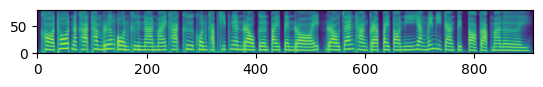

In [ ]:
%matplotlib inline
if spec is not None:
    imshow(spec, origin="lower")
    plt.show()

# Text-to-phoneme #

In [ ]:
import requests

url = 'https://api.aiforthai.in.th/vaja'

headers = {
    'Apikey': "ZXyKT5dWXcq9NHki4NN7QUmDY9Ba7X47",
    }

text = 'ขอโทษนะคะ ทำเรื่องโอนคืนนานมั้ยคะ คือคนขับคิดเงินเราเกินไปเป็นร้อย'
params = {'text':text,'mode':'ta'}

response = requests.get(url, params=params, headers=headers)



In [ ]:
import json
res = json.loads(response.text)
phoneme = res['output']['result']

phoneme

'kh-@@-z^-4|th-oo-t^-2|*n-a-z^-3|*kh-a-z^-3|*th-a-m^-0|*r-vva-ng^-2|*z-oo-n^-0|*kh-vv-n^-0|*n-aa-n^-0|*m-a-j^-3|*kh-a-z^-3|*kh-vv-z^-0|*kh-o-n^-0|*kh-a-p^-1|*kh-i-t^-3|*ng-q-n^-0|*r-a-w^-0|*k-qq-n^-0|*p-a-j^-0|*p-e-n^-0|*r-@@-j^-3|*'

In [ ]:
def formatPhoneme(phoneme):
    phoneme = phoneme.replace("|*","|").strip("|")
    syls = phoneme.split("|")
    phones = []
    for s in syls:
        #print(s)
        p  = s.split('-') # [ph,a,z^,3] => ph a3  / n a3 k^
        ph = [p[0],p[1]+p[-1]]
        if p[2]!="z^":
            ph.append(p[2])
        phones += ph

    return phones

out = formatPhoneme(phoneme)
print(" ".join(out).replace(" $ $$ $",""))

kh @@4 th oo2 t^ n a3 kh a3 th a0 m^ r vva2 ng^ z oo0 n^ kh vv0 n^ n aa0 n^ m a3 j^ kh a3 kh vv0 kh o0 n^ kh a1 p^ kh i3 t^ ng q0 n^ r a0 w^ k qq0 n^ p a0 j^ p e0 n^ r @@3 j^


In [ ]:
#ph-a-z^-3|n-a-k^-3|ng-aa-n^-0|*r-oo-ng^-0|*r-xx-m^-0|*
#ph a3 n a3 k^ ng aa0 n^ r oo0 ng^ r xx0 m^

In [ ]:
sPhoneme=response.json()['output']['result']
print(sPhoneme)


kh-@@-z^-4|th-oo-t^-2|*n-a-z^-3|*kh-a-z^-3|*th-a-m^-0|*r-vva-ng^-2|*z-oo-n^-0|*kh-vv-n^-0|*n-aa-n^-0|*m-a-j^-3|*kh-a-z^-3|*kh-vv-z^-0|*kh-o-n^-0|*kh-a-p^-1|*kh-i-t^-3|*ng-q-n^-0|*r-a-w^-0|*k-qq-n^-0|*p-a-j^-0|*p-e-n^-0|*r-@@-j^-3|*


In [ ]:
def convert_string(string):
    output=""
    # Remove the dashes and split the string into individual components
    components = string.replace("*", "").split("|")

    # Initialize empty lists for the phonemes and stress values
    phonemes = []
    stresses = []

    # Loop through each component and extract the phoneme and stress value
    for component in components:
        syl = component.split("-")
        #print(syl)
        if(len(syl) == 4):
          if(syl[0]=="$"):
            output = output + "sp" + " "
          elif(syl[2]=="z^"):
            output = output + syl[0]+" "+ syl[1]+syl[3] + " "
          else:
            output = output + syl[0]+" "+ syl[1]+syl[3]+" "+ syl[2]+" "

    return output


In [ ]:
print(sPhoneme)
print(convert_string(sPhoneme))

kh-@@-z^-4|th-oo-t^-2|*n-a-z^-3|*kh-a-z^-3|*th-a-m^-0|*r-vva-ng^-2|*z-oo-n^-0|*kh-vv-n^-0|*n-aa-n^-0|*m-a-j^-3|*kh-a-z^-3|*kh-vv-z^-0|*kh-o-n^-0|*kh-a-p^-1|*kh-i-t^-3|*ng-q-n^-0|*r-a-w^-0|*k-qq-n^-0|*p-a-j^-0|*p-e-n^-0|*r-@@-j^-3|*
kh @@4 th oo2 t^ n a3 kh a3 th a0 m^ r vva2 ng^ z oo0 n^ kh vv0 n^ n aa0 n^ m a3 j^ kh a3 kh vv0 kh o0 n^ kh a1 p^ kh i3 t^ ng q0 n^ r a0 w^ k qq0 n^ p a0 j^ p e0 n^ r @@3 j^ 


In [ ]:
input_string = "ph-a-z^-3|n-a-k^-3|*ng-aa-n^-0|*$-$-$-$|*"
output_string = convert_string(input_string)
print(output_string)

ph a3 n a3 k^ ng aa0 n^ sp 
